# **Proyek Analisis Data: Bike Sharing**

## **Menentukan Pertanyaan Bisnis**

- **Pertanyaan 1**: Pada rentang waktu manakah tingkat aktivitas *user* mencapai titik tertinggi dan terendah?
- **Pertanyaan 2**: Seberapa besar dampak perubahan musim dan variasi cuaca terhadap jumlah pengguna layanan?

## **Import Semua Packages/Library yang Digunakan**

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns

## **Data Wrangling**

### Gathering Data

#### Mengimpor file `day.scv`

In [36]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Mengimpor file `hour.scv`

In [37]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Gathering Data Insight

**Insight:**
- Dataset ini berisi data peminjaman sepeda dari sistem selama dua tahun (2011-2012)
- Dataset ini merupakan Data peminjaman sepeda yang disusun dalam dua format, `day.csv` yang berdasarkan hari (total 731 hari), dan `hour.csv` yang berdasarkan jam (total 17.379 jam).
- Dataset ini memiliki berbagai informasi terkait tanggal & waktu, musim & hari khusus, cuaca, dan jumlah pengguna.
- Dataset Bike Sharing ini berguna untuk menganalisis pola peminjaman sepeda berdasarkan faktor cuaca dan lingkungan, Yang berarti data ini dapat dimanfaatkan untuk penelitian tentang transportasi, prediksi tren, dan analisis mobilitas perkotaan.

### Assessing Data

#### Assessing `day_df`

In [38]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [39]:
print("Number of Duplicates: ", day_df.duplicated().sum())
day_df.isna().sum()

Number of Duplicates:  0


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [40]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Assessing `hour_df`

In [41]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [42]:
print("Number of Duplicates: ", hour_df.duplicated().sum())
hour_df.isna().sum()

Number of Duplicates:  0


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [43]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Assessing Insight

**Insight:**
- `day_df` & `hour_df`: Pada tabel ini, tidak ditemukan adanya nilai yang hilang (missing value) maupun duplikasi data. Namun, terdapat ketidaksesuaian tipe data pada kolom `dteday`, yang saat ini masih bertipe object. Untuk memastikan keakuratan dan kemudahan dalam analisis data, tipe data pada kolom tersebut perlu dikonversi menjadi datetime.

### Cleaning Data

#### Cleaning `day_df` table

In [44]:
day_df.info() # Before Cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [45]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [46]:
day_df.info() # After Cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [47]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Cleaning `hour_df` table

In [48]:
hour_df.info() # Before Cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [49]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [50]:
hour_df.info() # After Cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [51]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Changing Weather Label

In [52]:
day_df['season'] = day_df['season'].map({
    1: "Semi",
    2: "Panas",
    3: "Gugur",
    4: "Dingin"
})

day_df['weathersit'] = day_df['weathersit'].map({
    1: "Cerah, Sedikit berawan",
    2: "Berkabut, mendung, berawan sebagian",
    3: "Hujan ringan, salju ringan, badai petir ringan",
})

#### Cleaning Data Insight

**Insight:**
- `day_df` & `hour_df`: Pada tabel ini, telah dilakukan konversi tipe data pada kolom dteday dari *object* menjadi *datetime64[ns]* menggunakan salah satu fungsi dari pandas. Langkah ini memastikan data dapat diolah dengan lebih efisien dalam analisis berbasis waktu.

## **Exploratory Data Analysis (EDA)**

**Note**  
`weathersit`:
- 1: Cerah, sedikit berawan
- 2: Berkabut, mendung, berawan sebagian
- 3: Hujan ringan, salju ringan, badai petir ringan
- 4: Hujan lebat, badai es, kabut tebal, salju tebal

### Explore `day_df`

In [53]:
day_df.groupby(by ='weathersit').agg({
    'temp': 'mean',
    'windspeed': 'mean',
    'hum': 'mean',
})

,temp,windspeed,hum
weathersit,,,
"Berkabut, mendung, berawan sebagian",0.470366,0.186431,0.725887
"Cerah, Sedikit berawan",0.511541,0.190253,0.565594
"Hujan ringan, salju ringan, badai petir ringan",0.433440,0.243336,0.848872


In [54]:
day_df.groupby(by = ['season','weathersit']).agg({
    'cnt': 'sum'
})

cnt
season weathersit                                            
Dingin Berkabut, mendung, berawan sebagian             302510
       Cerah, Sedikit berawan                          519487
       Hujan ringan, salju ringan, badai petir ringan   19616
Gugur  Berkabut, mendung, berawan sebagian             250679
       Cerah, Sedikit berawan                          799443
       Hujan ringan, salju ringan, badai petir ringan   11007
Panas  Berkabut, mendung, berawan sebagian             288096
       Cerah, Sedikit berawan                          626986
       Hujan ringan, salju ringan, badai petir ringan    3507
Semi   Berkabut, mendung, berawan sebagian             155573
       Cerah, Sedikit berawan                          312036
       Hujan ringan, salju ringan, badai petir ringan    3739

In [55]:
day_df.groupby(by ='season').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
})

,casual,registered,cnt
season,,,
Dingin,129782,711831,841613
Gugur,226091,835038,1061129
Panas,203522,715067,918589
Semi,60622,410726,471348


In [56]:
day_df.groupby(by ='weathersit').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
})

,casual,registered,cnt
weathersit,,,
"Berkabut, mendung, berawan sebagian",169776,827082,996858
"Cerah, Sedikit berawan",446346,1811606,2257952
"Hujan ringan, salju ringan, badai petir ringan",3895,33974,37869


### Explore `hour_df`

In [57]:
per_hour = hour_df.groupby('hr').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
}).sort_values(by=['cnt'], ascending=False)
pd.DataFrame(per_hour)
per_hour.head(5)

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789


In [58]:
per_hour.to_csv("per_hour_df.csv", index=True)

### Exploratory Data Analysis (EDA) Insight

**Insight:**
- Pada tahap ini, yaitu tahap Exploratory Data Analysis (EDA), telah dilakukan analisis untuk mengidentifikasi keterkaitan antara kondisi cuaca dan musim dengan jumlah pengguna aplikasi sepeda. Selain itu, pola penggunaan aplikasi berdasarkan jam operasional juga telah dianalisis. Hasil dan temuan lebih rinci akan dibahas pada tahap berikutnya.

## **Visualization & Explanatory Analysis**

### **Pertanyaan 1**: Pada rentang waktu manakah tingkat aktivitas user mencapai titik tertinggi dan terendah?

#### Waktu Aktivitas Pengguna Tertinggi

<ipython-input-59-571a10ea3799>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=peak_hours, x='hr', y='cnt', palette='crest')
<ipython-input-59-571a10ea3799>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{h}:00" for h in peak_hours['hr']])


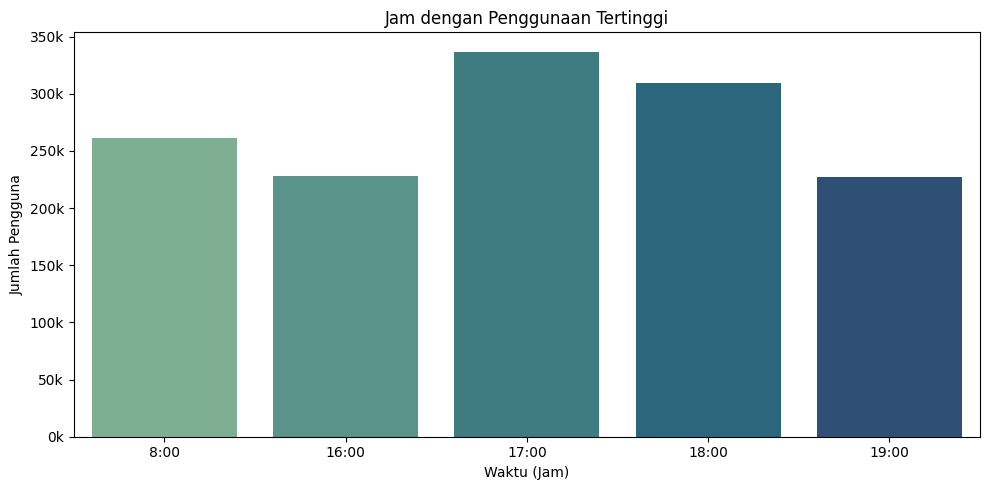

In [59]:
peak_hours = per_hour.nlargest(5, 'cnt').sort_values(by='hr').reset_index()

plt.figure(figsize=(10, 5))

ax = sns.barplot(data=peak_hours, x='hr', y='cnt', palette='crest')
ax.set_xticklabels([f"{h}:00" for h in peak_hours['hr']])
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.title('Jam dengan Penggunaan Tertinggi')
plt.xlabel('Waktu (Jam)')
plt.ylabel('Jumlah Pengguna')

plt.tight_layout()
plt.show()

#### Waktu Aktivitas Pengguna Terendah

<ipython-input-60-c7b789f914b3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=off_peak_hours, x='hr', y='cnt', palette='crest')
<ipython-input-60-c7b789f914b3>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{h}:00" for h in off_peak_hours['hr']])


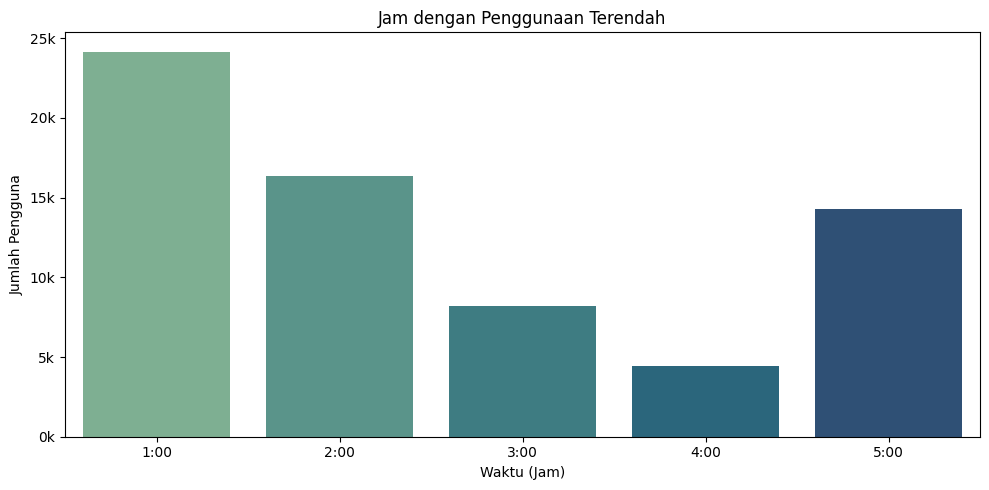

In [60]:
off_peak_hours = per_hour.nsmallest(5, 'cnt').sort_values(by='hr').reset_index()

plt.figure(figsize=(10, 5))

ax = sns.barplot(data=off_peak_hours, x='hr', y='cnt', palette='crest')
ax.set_xticklabels([f"{h}:00" for h in off_peak_hours['hr']])
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.title('Jam dengan Penggunaan Terendah')
plt.xlabel('Waktu (Jam)')
plt.ylabel('Jumlah Pengguna')

plt.tight_layout()
plt.show()

### **Pertanyaan 2**: Seberapa besar dampak perubahan musim dan variasi cuaca terhadap jumlah pengguna layanan?

#### Jumlah Pengguna berdasarkan Musim dan Kondisi Cuaca

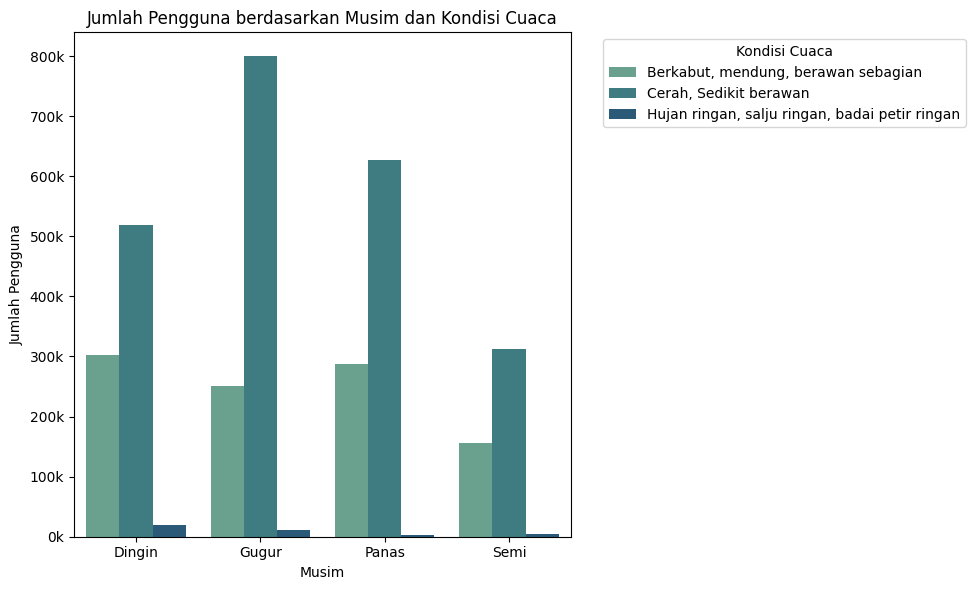

In [61]:
all_df = day_df.groupby(by=['season', 'weathersit']).agg({'cnt': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=all_df, x='season', y='cnt', hue='weathersit', palette='crest')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna')
plt.title('Jumlah Pengguna berdasarkan Musim dan Kondisi Cuaca')
plt.legend(title='Kondisi Cuaca', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Jumlah Pengguna berdasarkan Musim

<ipython-input-62-263a0d297312>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=seasonal_df, x='season', y='cnt', palette='crest')


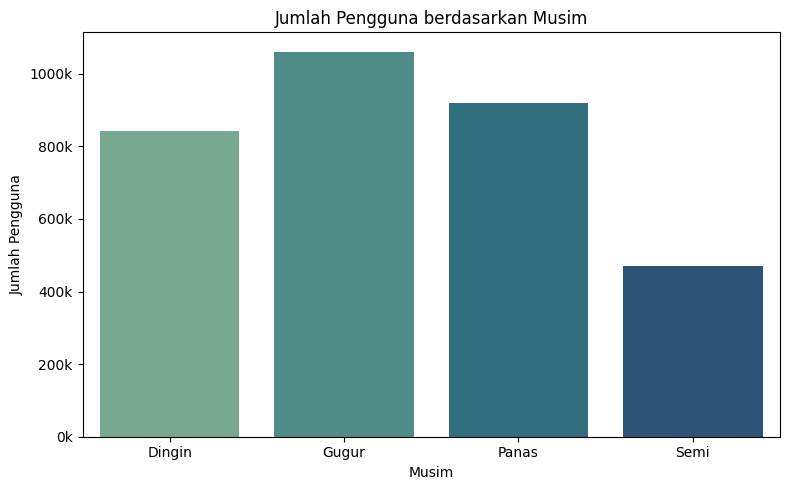

In [62]:
seasonal_df = day_df.groupby(by='season').agg({'cnt': 'sum'}).reset_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=seasonal_df, x='season', y='cnt', palette='crest')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna')
plt.title('Jumlah Pengguna berdasarkan Musim')

plt.tight_layout()
plt.show()

#### Jumlah Pengguna berdasarkan Kondisi Cuaca

<ipython-input-63-e963485b30d3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=season_bound_df, x='weathersit', y='cnt', palette='crest')


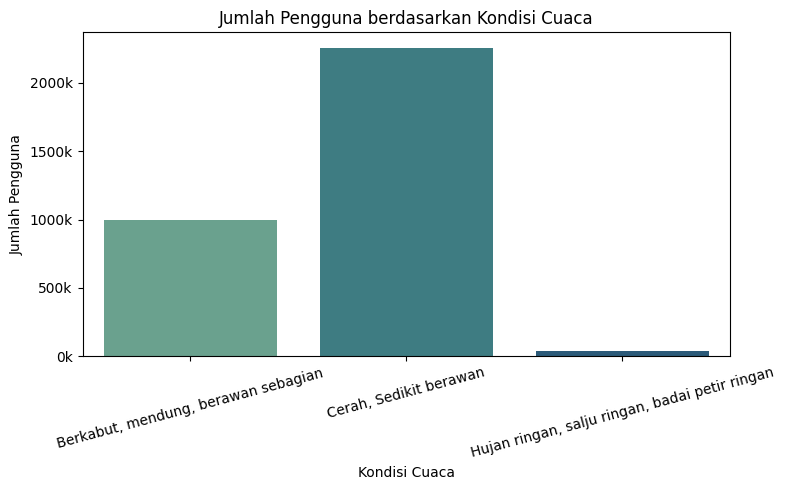

In [63]:
season_bound_df = day_df.groupby(by='weathersit').agg({'cnt': 'sum'}).reset_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=season_bound_df, x='weathersit', y='cnt', palette='crest')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna')
plt.title('Jumlah Pengguna berdasarkan Kondisi Cuaca')

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Visualization & Explanatory Analysis Insight

**Insight:**
- **Pertanyaan 1**: Pengguna paling aktif pada jam sibuk seperti pagi dan sore, kemungkinan besar karena jam berangkat dan pulang kerja atau kuliah. Sementara, Aktivitas pengguna terendah terjadi pada dini hari atau larut malam.
- **Pertanyaan 2**: Musim panas dan semi cenderung memiliki lebih banyak pengguna dibandingkan musim dingin. Sementara, Cuaca cerah meningkatkan penggunaan, sedangkan hujan atau badai menyebabkan penurunan signifikan.

## **Analisis Lanjutan (Opsional)**: Clustering - Manual Grouping

### Jumlah Pengguna berdasarkan Waktu Penggunaan

In [64]:
def categorize_time(hour):
    if 6 <= hour <= 11:
        return "Pagi"
    elif 12 <= hour <= 17:
        return "Siang"
    elif 18 <= hour <= 23:
        return "Sore"
    else:
        return "Malam"

hour_df["time_category"] = hour_df["hr"].apply(categorize_time)
clustering_result = hour_df.groupby("time_category")["cnt"].sum().reset_index()

<ipython-input-65-71a4bcb5cc59>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="time_category", y="cnt", data=clustering_result, palette="crest")


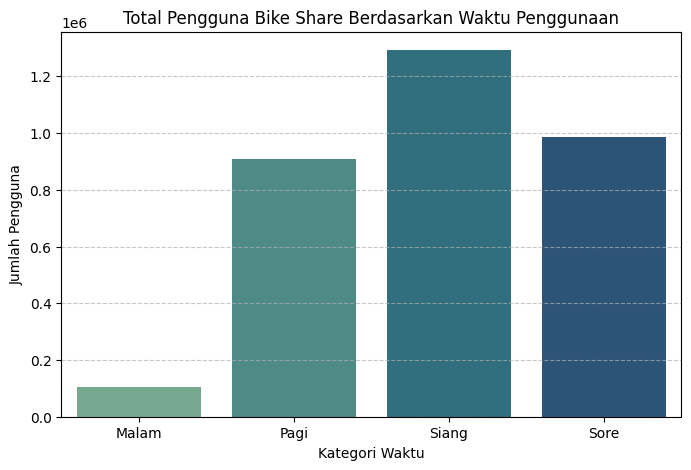

In [65]:
plt.figure(figsize=(8, 5))
sns.barplot(x="time_category", y="cnt", data=clustering_result, palette="crest")
plt.title("Total Pengguna Bike Share Berdasarkan Waktu Penggunaan")
plt.xlabel("Kategori Waktu")
plt.ylabel("Jumlah Pengguna")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Analisis Lanjutan Insight

**Insight:**
- Siang (12:00 - 17:59) → 1.292.742 pengguna
- Sore (18:00 - 23:59) → 986.109 pengguna
- Pagi (06:00 - 11:59) → 907.319 pengguna
- Malam (00:00 - 05:59) → 106.509 pengguna

**Conclusion:**
- Waktu siang dan sore adalah puncak penggunaan, sehingga layanan perlu dioptimalkan di jam ini (misalnya ketersediaan sepeda di stasiun tertentu).
- Malam hari memiliki penggunaan rendah, sehingga bisa menjadi kesempatan untuk maintenance sepeda atau strategi promosi agar lebih menarik digunakan pada jam tersebut.
- Pola penggunaan ini bisa digunakan untuk strategi penempatan sepeda, perawatan, atau bahkan pricing (harga sewa berbeda tergantung jam sibuk atau tidak).

## **Conclusion**

- **Conclusion pertanyaan 1**: Aktivitas pengguna mencapai titik tertinggi pada jam-jam sibuk, yaitu pagi dan sore hari, yang kemungkinan besar berkaitan dengan jadwal berangkat dan pulang kerja atau kuliah. Sementara, aktivitas pengguna cenderung rendah pada dini hari atau larut malam, menunjukkan bahwa sebagian besar pengguna lebih aktif pada siang dan sore hari.
- **Conclusion pertanyaan 2**: Penggunaan layanan cenderung lebih tinggi pada musim panas dan musim semi dibandingkan musim dingin. Hal ini menunjukkan bahwa kondisi cuaca hangat mendorong lebih banyak aktivitas pengguna. Sementara, Cuaca cerah meningkatkan jumlah pengguna layanan, sedangkan kondisi hujan atau badai menyebabkan penurunan signifikan dalam penggunaan layanan.

Temp

In [66]:
day_df.to_csv("day_df.csv", index=True)

In [67]:
hour_df.to_csv("hour_df.csv", index=True)